In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load California housing datasets
list = sns.get_dataset_names()
list

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [11]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
type(data)


sklearn.utils._bunch.Bunch

In [15]:
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [17]:
#Extract relevant columns
X = df[['MedInc']].values     #Predictor (Median income)
y = df['MedHouseVal'].values

In [19]:
#Split the dataset into training and testing dataset
X_train,X_test,Y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#Fit the llinear Regression Model
model = LinearRegression()
model.fit(X_train,Y_train)
#make predictions on the test set
y_pred = model.predict(X_test)

In [23]:
#Metrics and Interpretation
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,y_pred)

In [27]:
print("model Coefficients")
print(f" Slope (Coefficient for Carat):  {model.coef_[0]}")
print(f" Intercept : {model.intercept_}")
print(f"\nModel Performance Metrics")
print(f" Mean Squared Error (MSE) {mse}")
print(f"Root  Mean Squared Error (RMSE) {rmse}")
print(f"R^2  Score (Explained Variance) : {r2}")

model Coefficients
 Slope (Coefficient for Carat):  0.4193384939381273
 Intercept : 0.4445972916907872

Model Performance Metrics
 Mean Squared Error (MSE) 0.7091157771765548
Root  Mean Squared Error (RMSE) 0.8420901241414454
R^2  Score (Explained Variance) : 0.45885918903846656


In [33]:
#Print predicted vs actual values for the test set
print("\nPredicted vs actual prices (Test set):")
for actual,predicted in zip(y_test,y_pred):
    print(f" Actual : {actual:.2f} , Predicted : {predicted:.2f}")


Predicted vs actual prices (Test set):
 Actual : 0.48 , Predicted : 1.15
 Actual : 0.46 , Predicted : 1.51
 Actual : 5.00 , Predicted : 1.90
 Actual : 2.19 , Predicted : 2.85
 Actual : 2.78 , Predicted : 2.01
 Actual : 1.59 , Predicted : 2.42
 Actual : 1.98 , Predicted : 2.58
 Actual : 1.57 , Predicted : 1.99
 Actual : 3.40 , Predicted : 2.46
 Actual : 4.47 , Predicted : 3.85
 Actual : 1.23 , Predicted : 1.51
 Actual : 2.54 , Predicted : 1.70
 Actual : 2.15 , Predicted : 1.64
 Actual : 2.21 , Predicted : 1.85
 Actual : 2.20 , Predicted : 2.70
 Actual : 1.36 , Predicted : 2.05
 Actual : 1.78 , Predicted : 2.08
 Actual : 1.88 , Predicted : 2.18
 Actual : 1.40 , Predicted : 2.05
 Actual : 1.38 , Predicted : 1.36
 Actual : 4.25 , Predicted : 2.22
 Actual : 4.06 , Predicted : 2.28
 Actual : 1.39 , Predicted : 2.69
 Actual : 5.00 , Predicted : 3.02
 Actual : 1.62 , Predicted : 2.22
 Actual : 0.51 , Predicted : 1.27
 Actual : 1.51 , Predicted : 1.51
 Actual : 0.95 , Predicted : 1.81
 Actual 

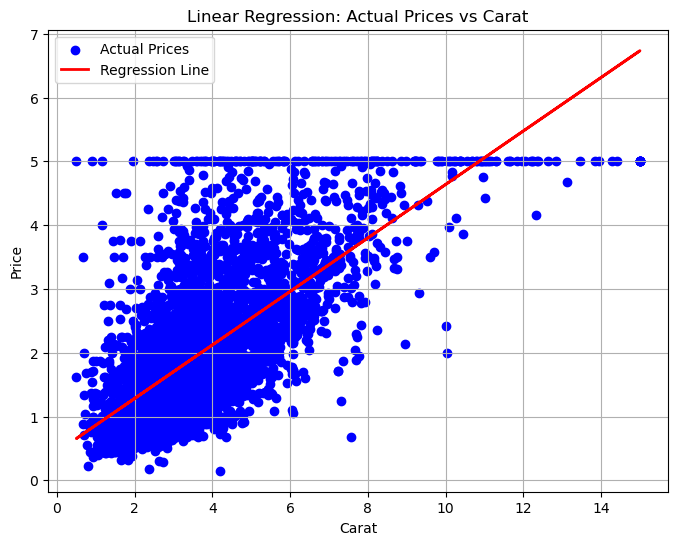

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='blue',label='Actual Prices')
plt.plot(X_test,y_pred,color='red',linewidth=2,label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linear Regression: Actual Prices vs Carat")
plt.legend()
plt.grid()
